In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sn
import pickle

newdf = pd.read_excel('Volve production data.xlsx')


In [2]:
newdf = np.round(newdf)

In [3]:
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


C:\Users\user\AppData\Local\Temp\ipykernel_14648\1968038701.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_14648\1968038701.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_14648\1968038701.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_14648\1968038701.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future ve

In [7]:
newdf.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [8]:
newdf = np.round(newdf)

In [9]:
newdf

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.0,...,%,33.0,10.0,33.0,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [10]:
to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
print(newdf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 4   AVG_ANNULUS_PRESS         7890 non-null   float64       
 5   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 6   AVG_WHP_P                 9155 non-null   float64       
 7   AVG_WHT_P                 9146 non-null   float64       
 8   DP_CHOKE_SIZE             15340 non-null  float64       
 9   BORE_OIL_VOL              9161 non-null   float64       
 10  BORE_WAT_VOL              9161 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


In [11]:
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 4   AVG_ANNULUS_PRESS         7890 non-null   float64       
 5   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 6   AVG_WHP_P                 9155 non-null   float64       
 7   AVG_WHT_P                 9146 non-null   float64       
 8   DP_CHOKE_SIZE             15340 non-null  float64       
 9   BORE_OIL_VOL              9161 non-null   float64       
 10  BORE_WAT_VOL              9161 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


In [12]:
newdf.columns


Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P',
       'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

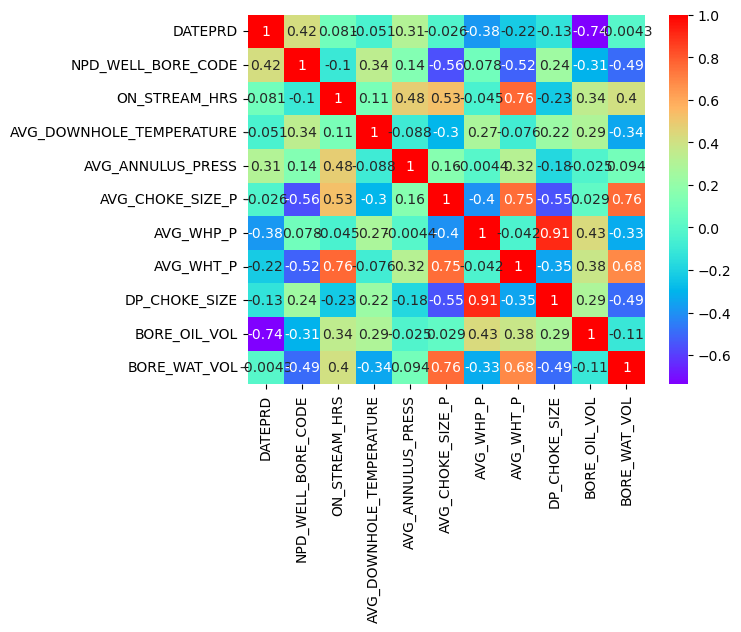

In [13]:
dataplot = sn.heatmap(newdf.corr(numeric_only=False), cmap="rainbow", annot= True)
  

plt.show()

In [14]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])

#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

In [15]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [14]:
#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [15]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [16]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [16]:
x_train_final

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
3374,0.96,0.000000,0.433333,1.00,0.248175,0.978723,5.0,4663.0
3760,0.96,0.000000,0.500000,1.00,0.240876,0.968085,4.0,4630.0
2900,0.96,0.000000,0.766667,0.56,0.350365,0.936170,16.0,3784.0
2090,0.96,0.972477,0.400000,0.50,0.605839,0.840426,49.0,7.0
7782,0.96,0.917431,0.466667,0.94,0.211679,0.925532,2.0,3346.0
...,...,...,...,...,...,...,...,...
5937,0.96,0.972477,0.000000,0.62,0.335766,0.968085,13.0,3374.0
5972,0.96,0.972477,0.000000,1.00,0.299270,0.957447,9.0,3359.0
6136,0.92,0.954128,0.000000,0.57,0.306569,0.946809,12.0,4301.0
1606,0.96,0.972477,0.366667,1.00,0.233577,0.861702,5.0,2145.0


In [17]:
y_train_final

3374     827.0
3760     525.0
2900    1592.0
2090    4412.0
7782     141.0
         ...  
5937    2459.0
5972    2108.0
6136    1671.0
1606    1298.0
8016       0.0
Name: BORE_OIL_VOL, Length: 5093, dtype: float64

In [18]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [19]:
y_pred = reg_all.predict(x_test_final)

In [20]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.55421096556942


In [21]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1338.07639
Feature: 1, Score: 280.89200
Feature: 2, Score: -1194.43707
Feature: 3, Score: 48.02134
Feature: 4, Score: 506.57085
Feature: 5, Score: 2572.30477
Feature: 6, Score: 13.05541
Feature: 7, Score: -0.40973


In [22]:
reg_all.coef_

array([ 1.33807639e+03,  2.80892004e+02, -1.19443707e+03,  4.80213352e+01,
        5.06570847e+02,  2.57230477e+03,  1.30554129e+01, -4.09730530e-01])

In [23]:
reg_all.intercept_

-1110.7026986609756

Correlation from Linear Regression

In [24]:
print("The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE +  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_VOL")

The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE +  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_VOL


In [25]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]

495

In [26]:
a=np.array(poly_reg.get_feature_names(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE' ,'BORE_WAT_VOL']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(len(a))

495


In [28]:
b = np.array(lin_reg.coef_)

In [29]:
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [30]:
pd.set_option('display.max_rows',30)

In [31]:
Correlation_Poly.head(30)

,Coefficients,Feature Name
0,12.409578,1
1,42.855906,ON_STREAM_HRS
2,-20.485679,AVG_DOWNHOLE_TEMPERATURE
3,44.221043,AVG_ANNULUS_PRESS
4,93.531333,AVG_CHOKE_SIZE_P
5,16.670247,AVG_WHP_P
6,16.043130,AVG_WHT_P
7,-14.526088,DP_CHOKE_SIZE
8,22.534930,BORE_WAT_VOL
9,63.863009,ON_STREAM_HRS^2


In [32]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 12.40958
Feature: 1, Score: 42.85591
Feature: 2, Score: -20.48568
Feature: 3, Score: 44.22104
Feature: 4, Score: 93.53133
Feature: 5, Score: 16.67025
Feature: 6, Score: 16.04313
Feature: 7, Score: -14.52609
Feature: 8, Score: 22.53493
Feature: 9, Score: 63.86301
Feature: 10, Score: 36.50836
Feature: 11, Score: 17.47237
Feature: 12, Score: 74.83259
Feature: 13, Score: 11.82428
Feature: 14, Score: 45.55840
Feature: 15, Score: 49.24707
Feature: 16, Score: -16.79044
Feature: 17, Score: -23.10254
Feature: 18, Score: -31.00394
Feature: 19, Score: 54.56845
Feature: 20, Score: 1.30802
Feature: 21, Score: -20.57815
Feature: 22, Score: 73.55376
Feature: 23, Score: -19.90936
Feature: 24, Score: 11.25144
Feature: 25, Score: 24.56524
Feature: 26, Score: -3.38429
Feature: 27, Score: -12.17208
Feature: 28, Score: 69.97981
Feature: 29, Score: -8.91915
Feature: 30, Score: 77.51711
Feature: 31, Score: 8.68587
Feature: 32, Score: 62.56454
Feature: 33, Score: 20.72884
Feature: 34, Score

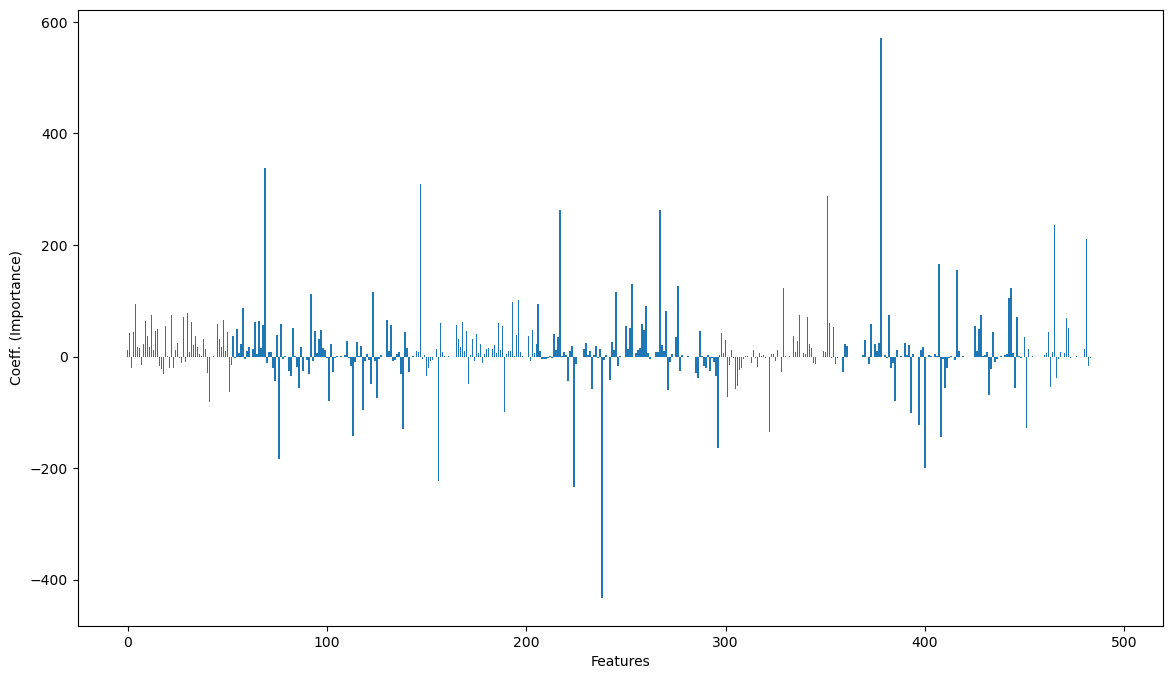

In [33]:
# plot feature importance
plt.figure(figsize = (14,8))
plt.xlabel("Features")
plt.ylabel("Coeff. (Importance)")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
y_pred = lin_reg.predict(x_pol_test)

In [35]:
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Polynomial regression(4th order) for oil volume production is 0.9409286155456174


In [36]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df.head(50)

,Real Values,Predicted Values
6805,643.0,-117.737031
6756,613.0,421.160424
5221,4634.0,4442.385000
4435,688.0,746.357824
5261,3571.0,3537.075522
...,...,...
6176,928.0,1729.094957
4404,719.0,539.194727
4942,0.0,44.799962
3628,575.0,365.474285


In [37]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


In [40]:
import pickle 

In [41]:
pickle_out = open("poly_reg.pkl","wb")


In [42]:
pickle.dump(poly_reg,pickle_out)

In [43]:
pickle_out.close()

# Comparison between Actual Oil Production and our Models Predicted Oil Production

Well no.5599

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872107


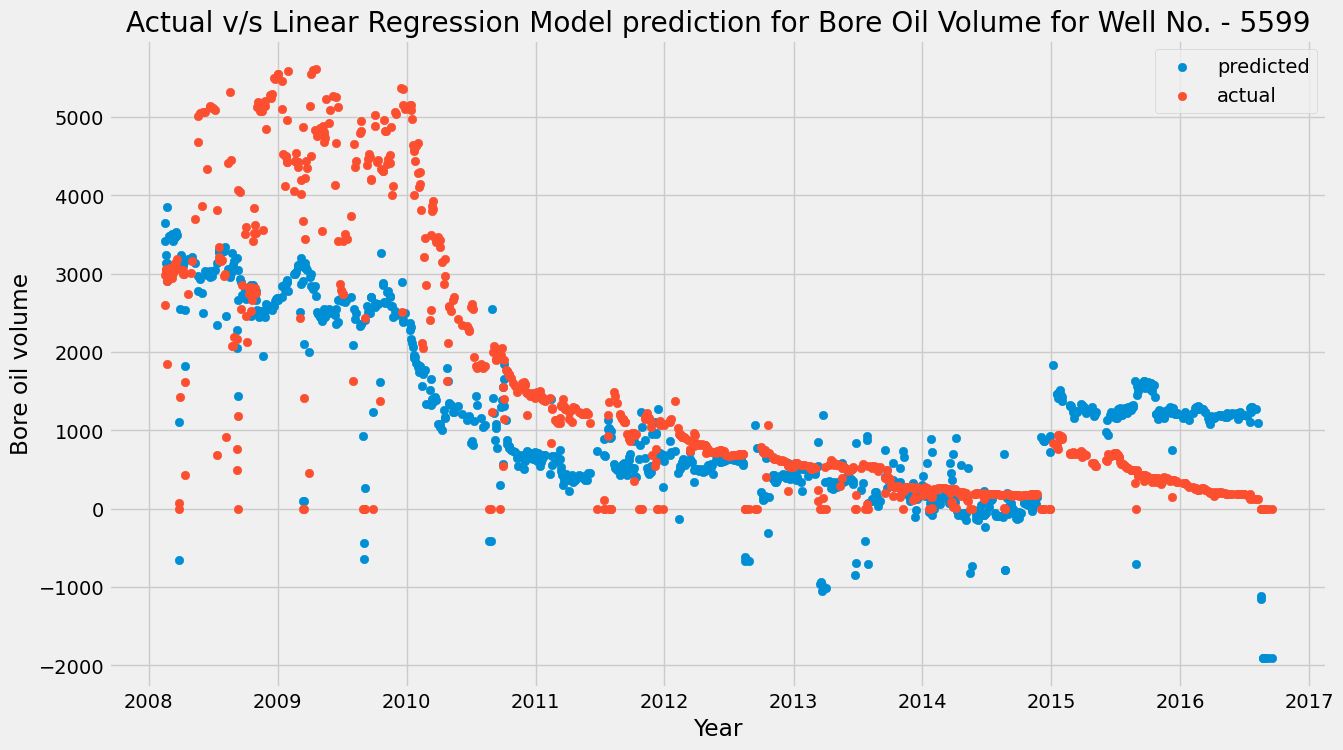

In [44]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final))

In [45]:
print("The linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE +  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_VOL")

The linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE +  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_VOL


The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872107
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is 0.9513912607509022


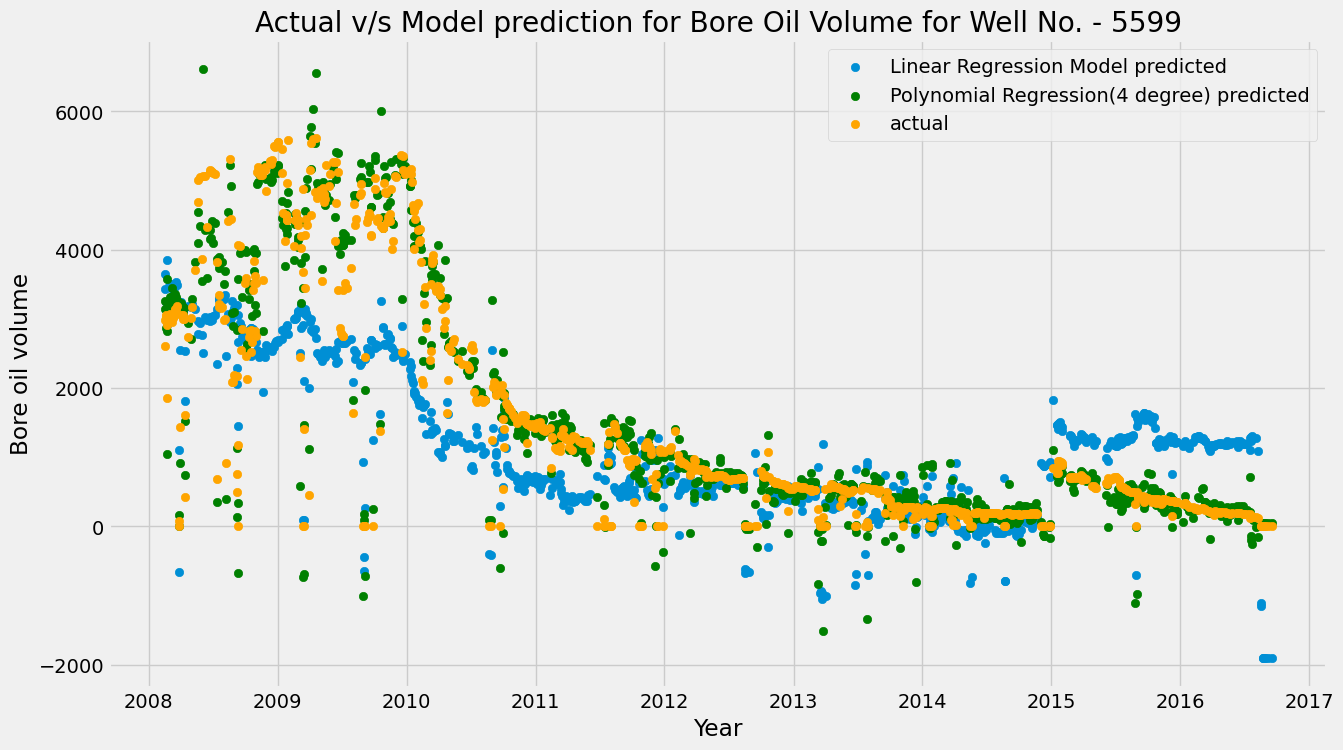

In [46]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)


x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5599,y_test_5599_final ))



Well no. 5351

The R2 value for linear regression for oil volume production is 0.675022521025483


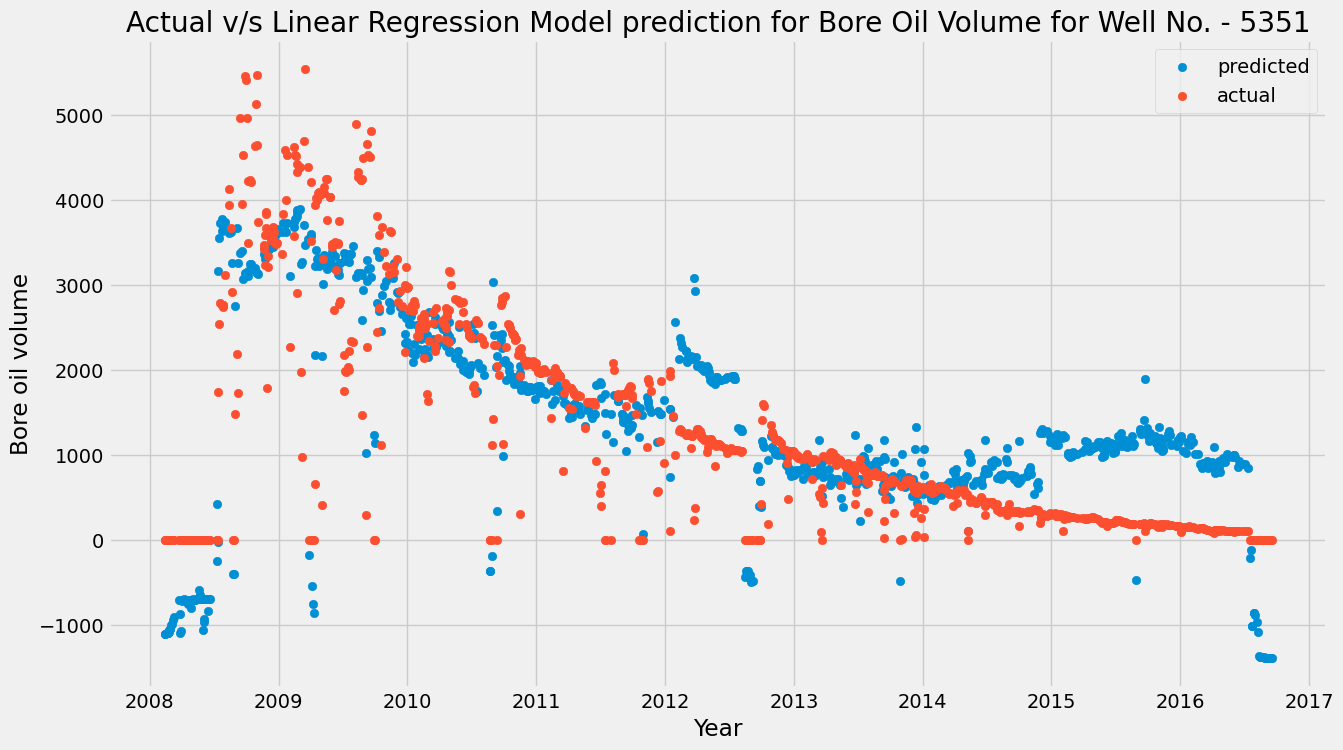

In [47]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))

The R2 value for linear regression for oil volume production in well 5351 is 0.675022521025483
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 0.9427786798986396


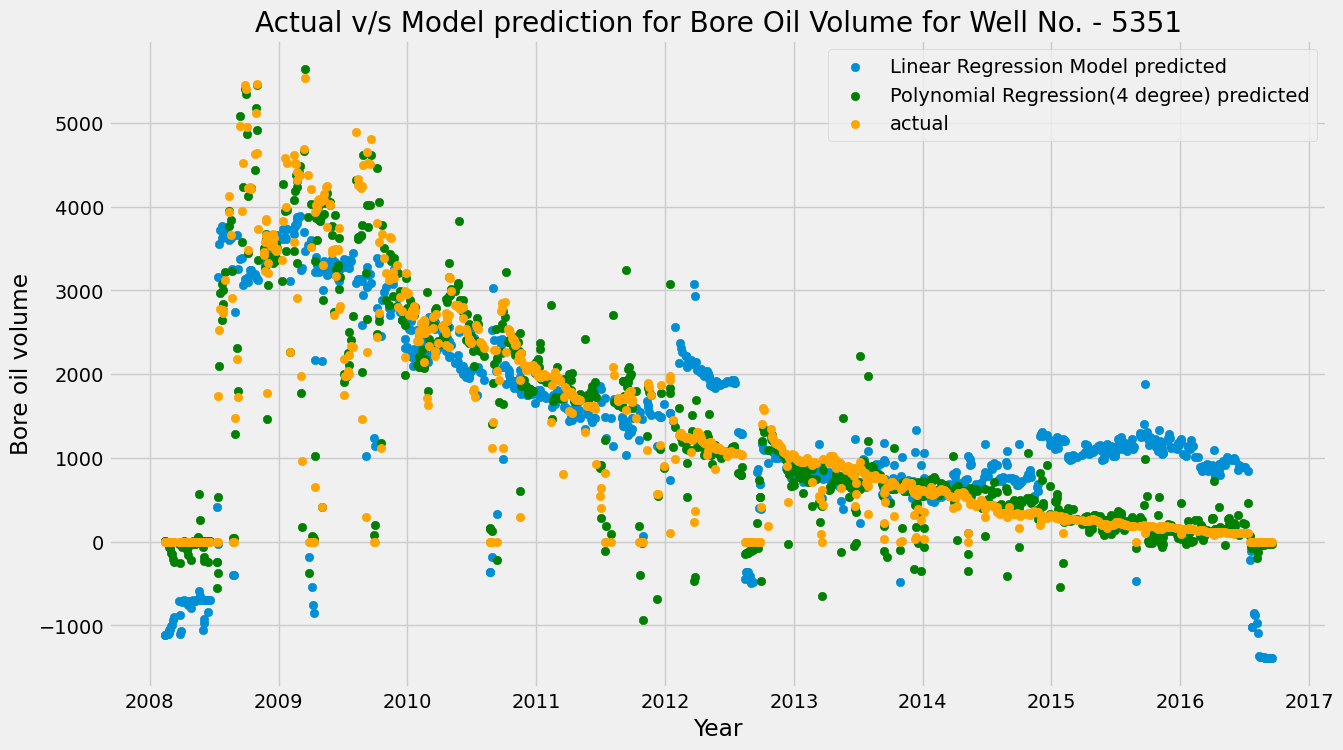

In [48]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for linear regression for oil volume production in well 5351 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))



## Artificial neural network using keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
# Define custom metrics
def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [48]:

#  Model 1
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=x_train_final.shape[1]))

model.add(Dense(150, kernel_initializer='normal', activation='relu'))

model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=[r_square, rmse])

# Train the model
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,verbose=1, mode='auto', restore_best_weights=True)
model.fit(
    x_train_final,
    y_train_final,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split= .15,
    callbacks= [es]
)

Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 4s - 32ms/step - loss: 1144.3943 - r_square: -6.5902e-01 - rmse: 1144.3943 - val_loss: 1042.1385 - val_r_square: -5.0365e-01 - val_rmse: 1042.1385
Epoch 2/100
136/136 - 1s - 5ms/step - loss: 966.6536 - r_square: -1.5875e-01 - rmse: 966.6536 - val_loss: 869.1685 - val_r_square: 0.0952 - val_rmse: 869.1685
Epoch 3/100
136/136 - 1s - 4ms/step - loss: 860.3720 - r_square: 0.0871 - rmse: 860.3720 - val_loss: 752.0841 - val_r_square: 0.2140 - val_rmse: 752.0841
Epoch 4/100
136/136 - 1s - 4ms/step - loss: 797.5038 - r_square: 0.2173 - rmse: 797.5038 - val_loss: 688.2670 - val_r_square: 0.3432 - val_rmse: 688.2670
Epoch 5/100
136/136 - 1s - 4ms/step - loss: 756.3116 - r_square: 0.2842 - rmse: 756.3116 - val_loss: 689.9010 - val_r_square: 0.3271 - val_rmse: 689.9010
Epoch 6/100
136/136 - 1s - 4ms/step - loss: 714.0745 - r_square: 0.3226 - rmse: 714.0745 - val_loss: 638.9075 - val_r_square: 0.4194 - val_rmse: 638.9075
Epoch 7/100
136/136 - 1s - 4ms/step - loss: 726.0969 - r_square: 0.3

Epoch 54/100
136/136 - 1s - 4ms/step - loss: 359.8396 - r_square: 0.8338 - rmse: 359.8396 - val_loss: 296.3078 - val_r_square: 0.8828 - val_rmse: 296.3078
Epoch 55/100
136/136 - 1s - 4ms/step - loss: 341.4055 - r_square: 0.8521 - rmse: 341.4055 - val_loss: 302.7965 - val_r_square: 0.8732 - val_rmse: 302.7965
Epoch 56/100
136/136 - 1s - 4ms/step - loss: 368.4415 - r_square: 0.8267 - rmse: 368.4415 - val_loss: 309.9568 - val_r_square: 0.8607 - val_rmse: 309.9568
Epoch 57/100
136/136 - 1s - 4ms/step - loss: 369.7427 - r_square: 0.8298 - rmse: 369.7427 - val_loss: 317.8655 - val_r_square: 0.8715 - val_rmse: 317.8655
Epoch 58/100
136/136 - 1s - 4ms/step - loss: 358.6153 - r_square: 0.8424 - rmse: 358.6153 - val_loss: 286.4943 - val_r_square: 0.8808 - val_rmse: 286.4943
Epoch 59/100
136/136 - 1s - 5ms/step - loss: 353.6785 - r_square: 0.8467 - rmse: 353.6785 - val_loss: 300.8394 - val_r_square: 0.8715 - val_rmse: 300.8394
Epoch 60/100
136/136 - 1s - 4ms/step - loss: 360.0126 - r_square: 0.82

In [35]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,917 (402.02 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,612 (268.02 KB)

In [36]:
model.evaluate(x_test_final, y_test_final, batch_size=50)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262.5136 - r_square: 0.9040 - rmse: 262.5136


[258.1605224609375, 0.9115275740623474, 258.1605224609375]

In [ ]:

#  Model 2(less acurracy)
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=x_train_final.shape[1]))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=[r_square, rmse])

# Train the model
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,verbose=1, mode='auto', restore )
model.fit(
    x_train_final,
    y_train_final,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split= .15,
    callbacks= [es]
)

In [37]:
model.save("neural_cnn.h5")

In [61]:
from keras.models import load_model

# Load the model from file
loaded_model = load_model('neural_cnn.h5')

In [38]:
def polynomial_pred(input_features):
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    
    prediction =lin_reg.predict(poly_reg.fit_transform(input_features))
    
    # If the output is a single value, you might want to flatten it
    return prediction[0]

In [39]:
def linear_pred(input_features):
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    prediction =reg_all.predict(input_features)
    
    # If the output is a single value, you might want to flatten it
    return prediction[0]

In [40]:
def predict_value_neural(input_features):
    
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    prediction = model.predict(input_features)
    
    # If the output is a single value, you might want to flatten it
    return prediction[0][0]

## visualizing different model values

In [45]:
actual = []
pred = []
pred_linear = []
poly_pred = []
for ind in range(10):
    actual.append(y_test_5351_final.iloc[ind])
    pred.append(predict_value_neural(x_test_5351final.iloc[ind]))
    pred_linear.append(linear_pred(x_test_5351final.iloc[ind]))
    poly_pred.append(polynomial_pred(x_test_5351final.iloc[ind]))
dataf = pd.DataFrame({"actual" : actual , "pred" : pred, " linear" : pred_linear , "poly" : poly_pred})
dataf

NameError: name 'y_test_5351_final' is not defined

In [124]:
x_test_5351final.iloc[3]
# y_test_5351_final.iloc[3]

ON_STREAM_HRS                0.960000
AVG_DOWNHOLE_TEMPERATURE     0.963303
AVG_ANNULUS_PRESS            0.000000
AVG_CHOKE_SIZE_P             0.360000
AVG_WHP_P                    0.583942
AVG_WHT_P                    0.797872
DP_CHOKE_SIZE               47.000000
BORE_WAT_VOL                 2.000000
Name: 5261, dtype: float64

## Plottting all mdoel prediction vs real values

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


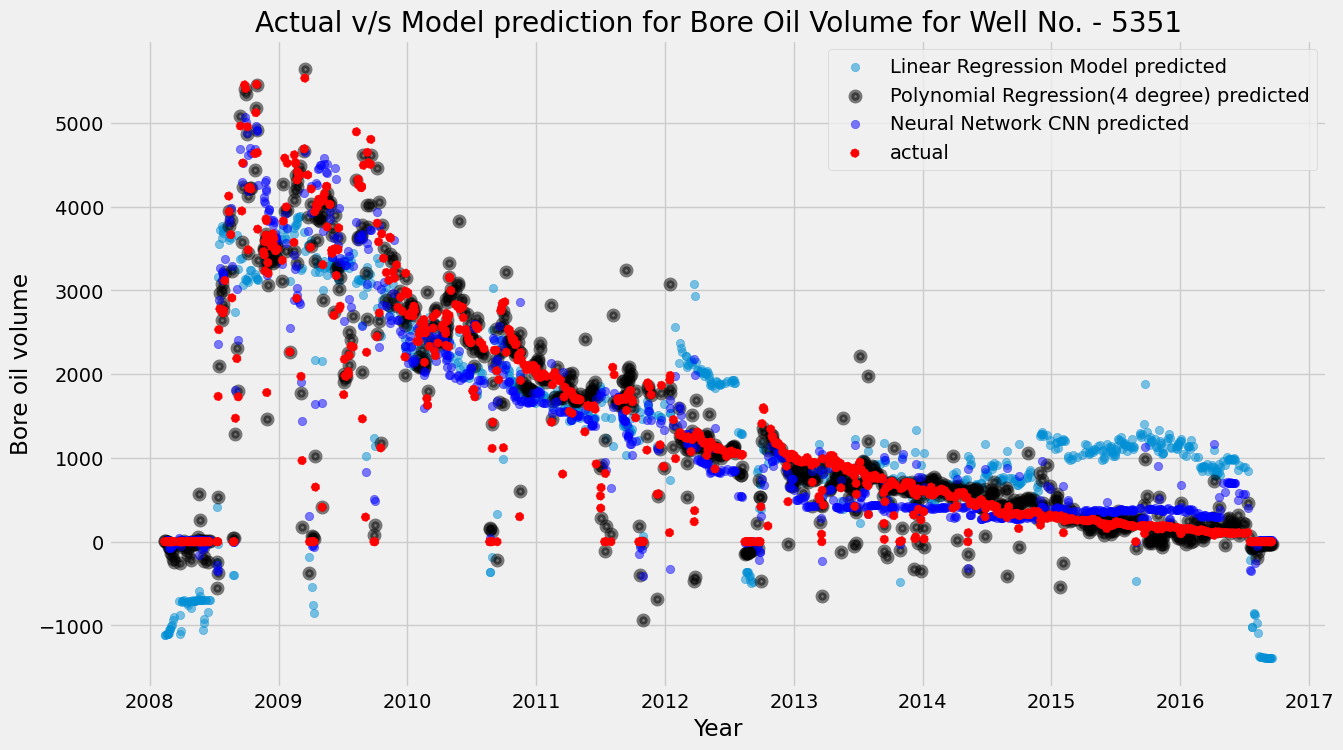

In [122]:
# %matlpotlib inline

X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

y_neural = model.predict(x_test_5351final)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted' , alpha = 0.5 )
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'black' , alpha = 0.5 , linewidth = 4)
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_neural,label='Neural Network CNN predicted', color = 'blue' , alpha = 0.5)
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'red' , linestyle = "--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')
plt.savefig('my_plot.png') 
